# Name:Upama Roy Chowdhury
# Task_3:Exploratory Data Analysis - Retail.
# Dataset: https://bit.ly/3i4rbWl

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [8]:
data=pd.read_csv("SampleSuperstore.csv")
data.head(10)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
5,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Furniture,Furnishings,48.8600,7,0.00,14.1694
6,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Art,7.2800,4,0.00,1.9656
7,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Technology,Phones,907.1520,6,0.20,90.7152
8,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Binders,18.5040,3,0.20,5.7825
9,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Appliances,114.9000,5,0.00,34.4700


In [9]:
data.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [10]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [11]:
data.shape

(9994, 13)

In [12]:
data.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [13]:
import warnings
warnings.filterwarnings('ignore')

In [14]:
data.duplicated().sum()

17

In [15]:
data.nunique()

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

In [16]:
data.drop_duplicates(keep="first",inplace=True)

In [17]:
data.shape

(9977, 13)

In [18]:
correlation=data.corr()
correlation

,Postal Code,Sales,Quantity,Discount,Profit
Postal Code,1.000000,-0.023476,0.013110,0.059225,-0.029892
Sales,-0.023476,1.000000,0.200722,-0.028311,0.479067
Quantity,0.013110,0.200722,1.000000,0.008678,0.066211
Discount,0.059225,-0.028311,0.008678,1.000000,-0.219662
Profit,-0.029892,0.479067,0.066211,-0.219662,1.000000


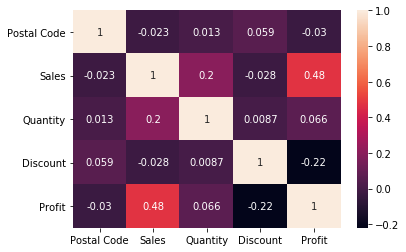

In [19]:
sns.heatmap(correlation,annot=True)

In [20]:
data_con=data.select_dtypes(include=[np.number])

In [21]:
data=data.drop(['Postal Code'],axis=1)

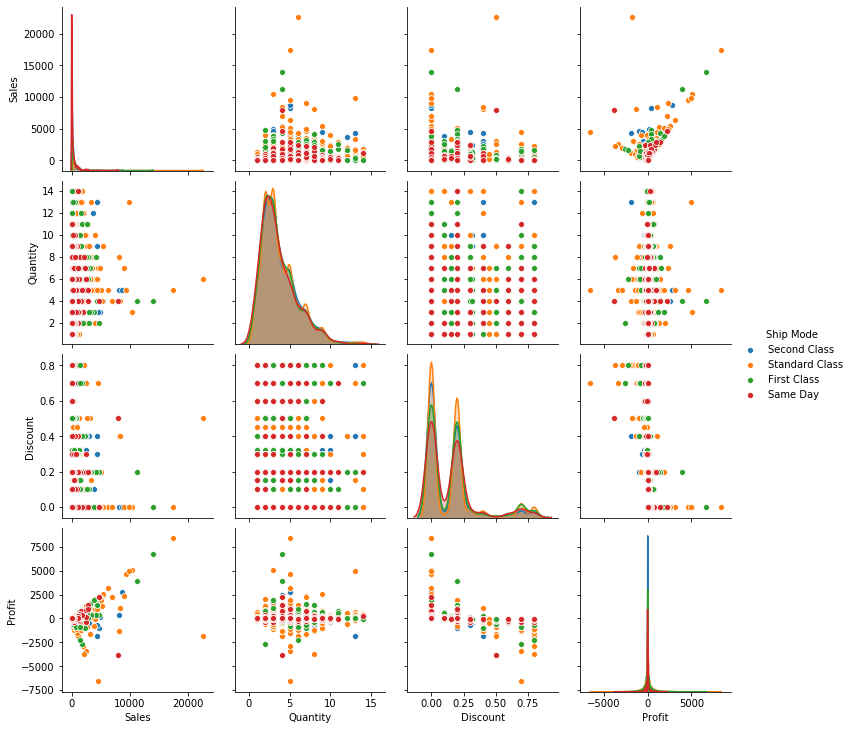

In [22]:
sns.pairplot(data,hue="Ship Mode")

In [23]:
data['Ship Mode'].value_counts()

Standard Class    5955
Second Class      1943
First Class       1537
Same Day           542
Name: Ship Mode, dtype: int64

In [24]:
#value counts for segment
data['Segment'].value_counts()

Consumer       5183
Corporate      3015
Home Office    1779
Name: Segment, dtype: int64

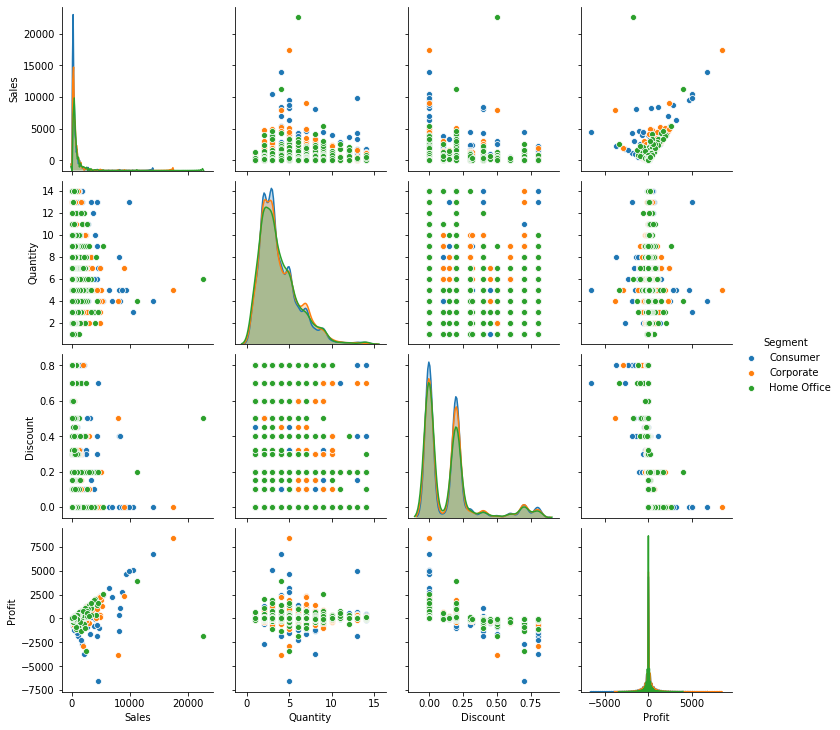

In [25]:
#plotting pairplot for segment
sns.pairplot(data,hue="Segment")

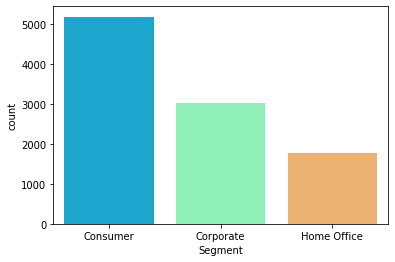

In [26]:
sns.countplot(x='Segment',data=data,palette='rainbow')

In [27]:
data['Category'].value_counts()

Office Supplies    6012
Furniture          2118
Technology         1847
Name: Category, dtype: int64

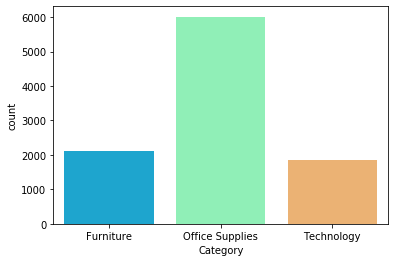

In [28]:
sns.countplot(x='Category',data=data,palette='rainbow')

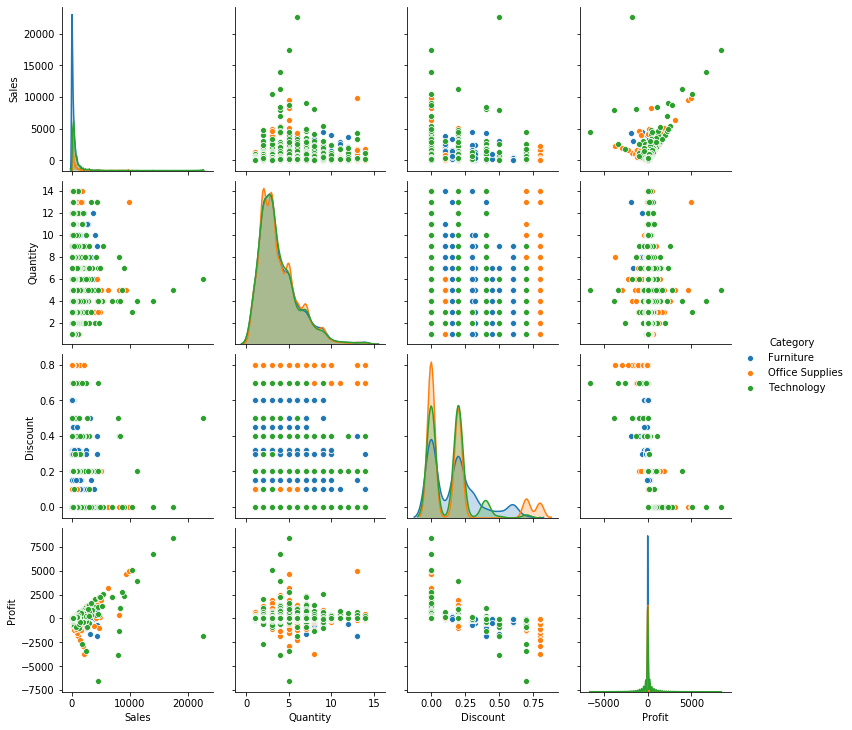

In [29]:
sns.pairplot(data,hue="Category")

In [30]:
data['Sub-Category'].value_counts()

Binders        1522
Paper          1359
Furnishings     956
Phones          889
Storage         846
Art             795
Accessories     775
Chairs          615
Appliances      466
Labels          363
Tables          319
Envelopes       254
Bookcases       228
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: Sub-Category, dtype: int64

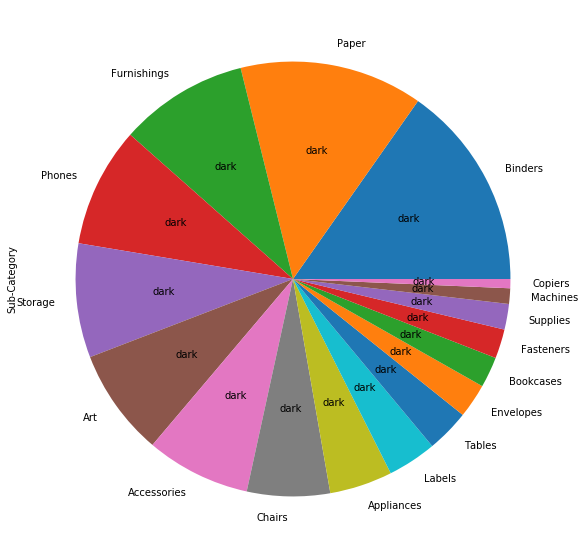

In [31]:
plt.figure(figsize=(12,10))
data['Sub-Category'].value_counts().plot.pie(autopct="dark")
plt.show()

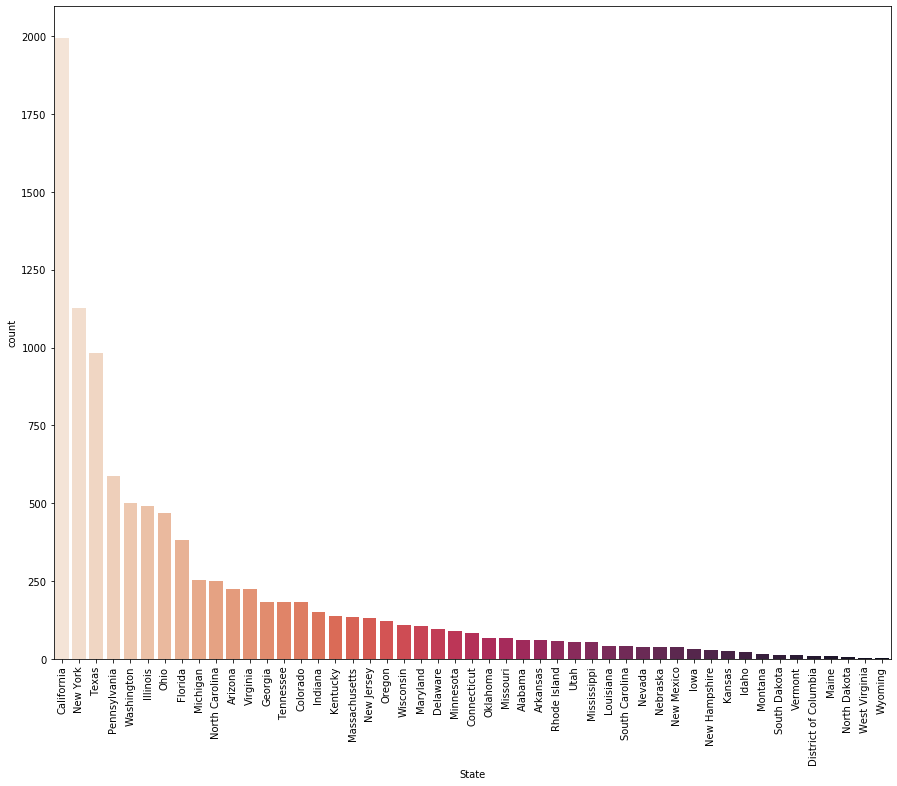

In [33]:
plt.figure(figsize=(15,12))
sns.countplot(x='State',data=data,palette='rocket_r',order=data['State'].value_counts().index)
plt.xticks(rotation=90)
plt.show()

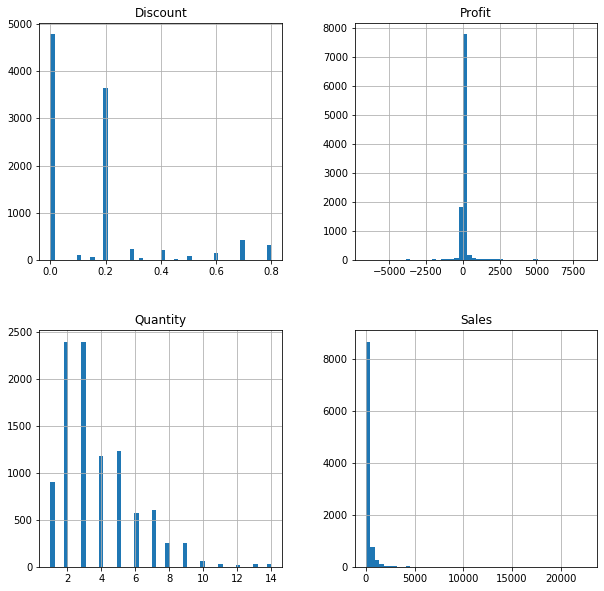

In [34]:
data.hist(figsize=(10,10),bins=50)
plt.show()

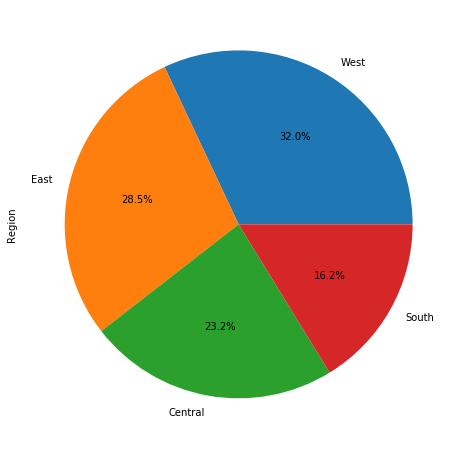

In [35]:
plt.figure(figsize=(10,8))
data['Region'].value_counts().plot.pie(autopct='%1.1f%%')
plt.show()

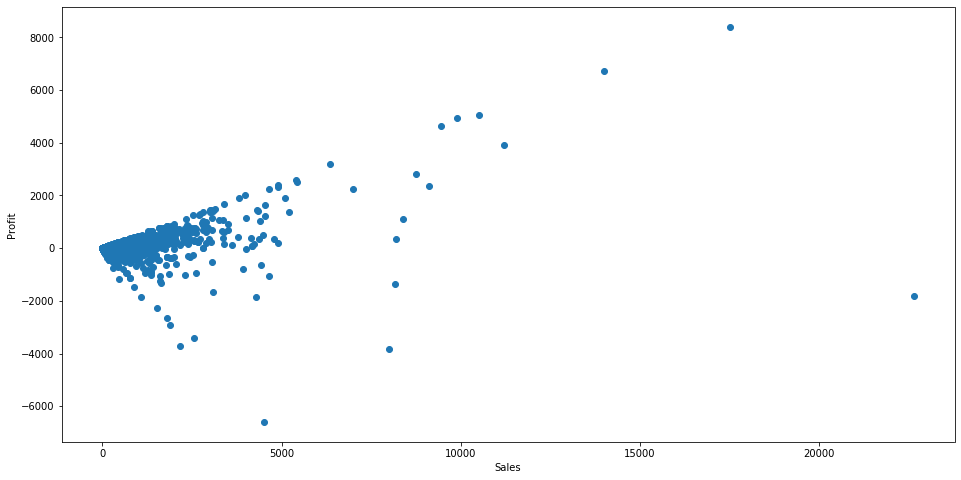

In [36]:
#profit vs discount
from matplotlib import style
fig,ax=plt.subplots(figsize=(16,8))
ax.scatter(data['Sales'],data['Profit'])
ax.set_xlabel('Sales')
ax.set_ylabel('Profit')
plt.show()

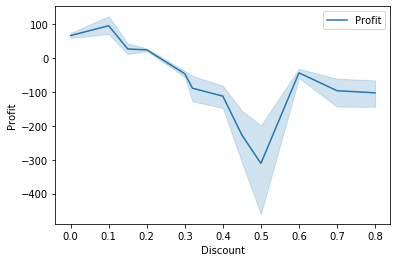

In [37]:
sns.lineplot(x='Discount',y='Profit',label='Profit',data=data)
plt.legend()
plt.show()

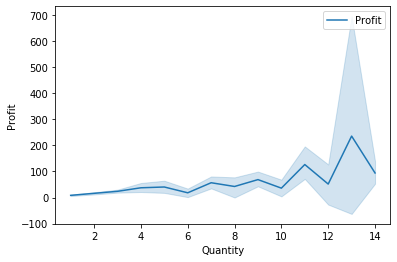

In [38]:
#profit vs quantity
sns.lineplot(x='Quantity',y='Profit',label='Profit',data=data)
plt.legend()
plt.show()

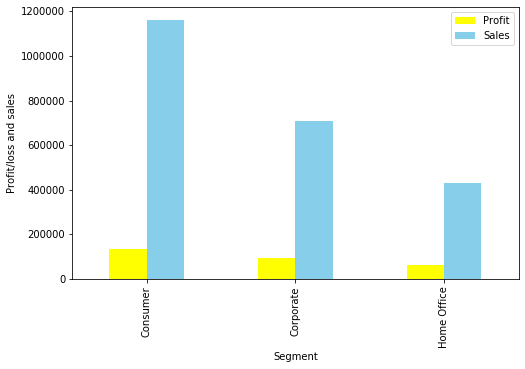

In [44]:
data.groupby('Segment')[['Profit','Sales']].sum().plot.bar(color=['yellow','skyblue'],figsize=(8,5))
plt.ylabel('Profit/loss and sales')
plt.show()

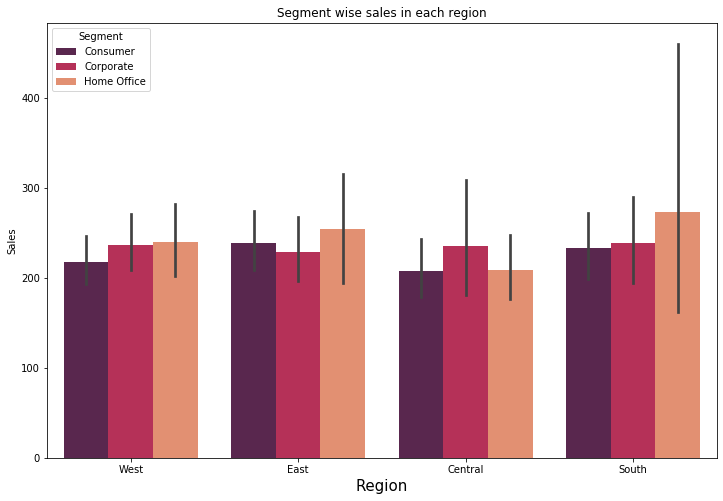

In [42]:
plt.figure(figsize=(12,8))
plt.title('Segment wise sales in each region')
sns.barplot(x='Region',y='Sales',data=data,hue='Segment',order=data['Region'].value_counts().index,palette='rocket')
plt.xlabel('Region',fontsize=15)
plt.show()

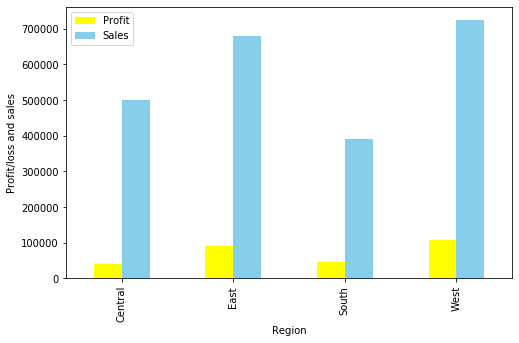

In [43]:
data.groupby('Region')[['Profit','Sales']].sum().plot.bar(color=['yellow','skyblue'],figsize=(8,5))
plt.ylabel('Profit/loss and sales')
plt.show()


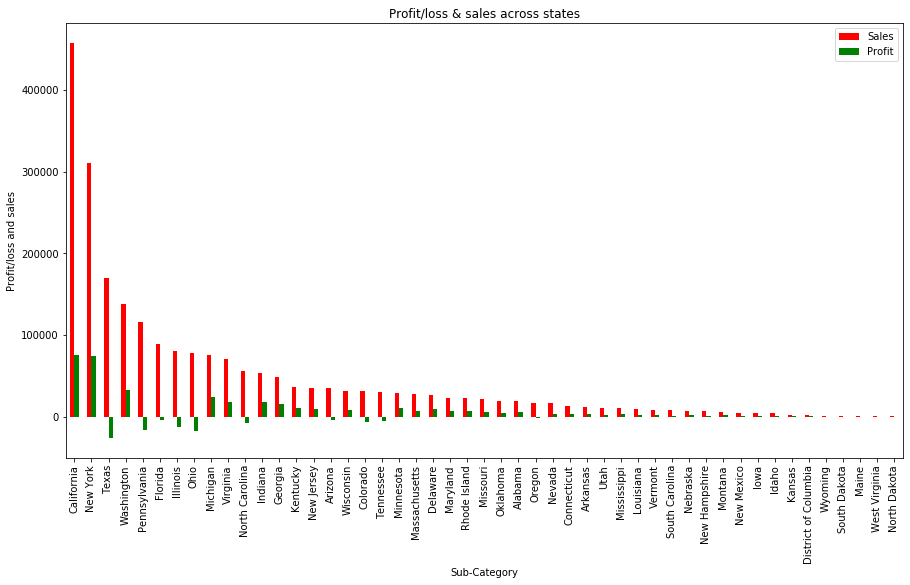

In [49]:
ps=data.groupby('State')[['Sales','Profit']].sum().sort_values(by='Sales',ascending=False)
ps[:].plot.bar(color=['red','green'],figsize=(15,8))
plt.title('Profit/loss & sales across states')
plt.xlabel('Sub-Category')
plt.ylabel('Profit/loss and sales')
plt.show()

In [46]:
top_states=data['State'].value_counts().nlargest(10)
top_states

California        1996
New York          1127
Texas              983
Pennsylvania       586
Washington         502
Illinois           491
Ohio               468
Florida            383
Michigan           254
North Carolina     249
Name: State, dtype: int64

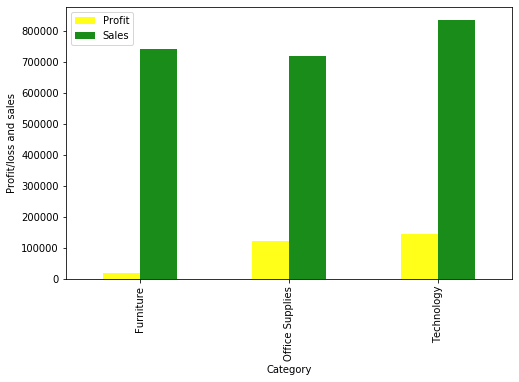

In [47]:
data.groupby('Category')[['Profit','Sales']].sum().plot.bar(color=['yellow','green'],alpha=0.9,figsize=(8,5))
plt.ylabel('Profit/loss and sales')
plt.show()

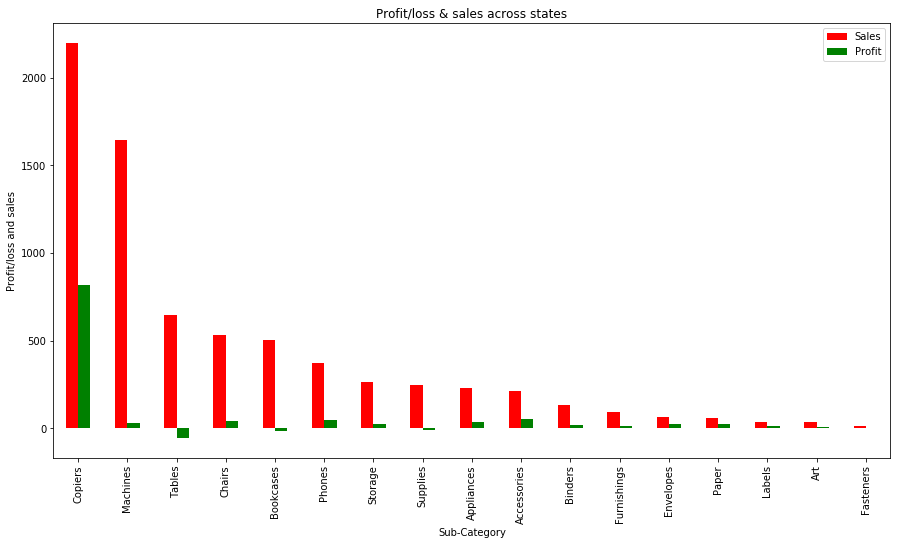

In [48]:
# Technology and furniture have high profit
ps=data.groupby('Sub-Category')[['Sales','Profit']].mean().sort_values(by='Sales',ascending=False)
ps[:].plot.bar(color=['red','green'],figsize=(15,8))
plt.title('Profit/loss & sales across states')
plt.xlabel('Sub-Category')
plt.ylabel('Profit/loss and sales')
plt.show()